 # Tarea 9.8 #
 ### Moisés Echeverría ###
 #### FIS1344 - Métodos númericos y probabilidades ####

Calcule la integral del seno entre 0 y 1. Para ello use el método compuesto de Simpson y la cuadratura adaptativa implementada en clase. Hágalo para varias precisiones y grafique el tiempo que tardan ambos métodos en función de la precisión. (Para la precisión del método de Simpson es necesario usar la fórmula de error para calcular el número n de intervalos).}

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from time import time

Utilizando la formula compuesta de Simpson extraemos el error:
$$
error=-\frac{h^4 (b-a)}{180}f''(\mu)
$$
Si lo aplicamos a nuestro caso del seno, sabemos que la segunda derivada es -seno:
$$
error=\frac{h^4 (b-a)}{180}\sin(\mu)
$$
y para calcular la tolerancia máxima usamos el intervalo que nos dieron, en el punto más alto que en este caso es 1:
$$
tol(max)=\frac{h^4}{180}\sin(1)
$$
Con esto podemos saber los intervalos que obtendremos:


In [17]:
def cant_int(tol):
    
    h=((180*tol)/np.sin(1))**(1/4)  
    n=int(1/h)
    if n<=2:
        raise ValueError ('Necesitas mayor cantidad de intervalos')
    elif n%2!=0:                          
        return n+1
    else:                                 
        return n

$$
Simpson=\frac{h}{3}\left[f(a) + 2\sum_{i=1}^{n/2-1} f(x_{2i}) + 4\sum_{i=1}^{n/2} f(x_{2i-1}) + f(b)\right]
$$

In [18]:
def Simpson_C(f, a, b, tol):
    n=(cant_int(tol))
    h=(b - a)/n
    x=np.linspace(a, b, n+1)
    fx1=np.zeros(0)     
    fx1=[np.append(fx1,f(x[2*i])) for i in range(1, int(len(x)/2))]
    fx2=np.zeros(0)
    fx2=[np.append(fx2,f(x[2*i-1])) for i in range(1, int(len(x)/2)+1)]  
    
    return (h/3)*(f(a) + 2*np.sum(fx1) + 4*np.sum(fx2) + f(b))

In [19]:
class MaxIterations(Exception):
    pass

def adaptive(f, a, b, tol, N=100000):
    
    # Variables iniciales
    approx = 0
    i = 0
    toli = [10*tol]
    ai = [a]
    hi = [(b - a)/2]
    fai = [f(a)]
    fbi = [f(b)]
    fci = [f(a + hi[i])]
    S0i = [hi[i]*(fai[i] + 4*fci[i] + fbi[i])/3]
    Li = [1]
    
        
    
    while i >= 0:
        
        fd = f(ai[i] + hi[i]/2)
        fe = f(ai[i] + 3*hi[i]/2)
        S1 = hi[i]*(fai[i] + 4*fd + fci[i])/6
        S2 = hi[i]*(fci[i] + 4*fe + fbi[i])/6
        ai_prec = ai[i]
        hi_prec = hi[i]
        fai_prec = fai[i]
        fbi_prec = fbi[i]
        fci_prec = fci[i]
        toli_prec = toli[i]
        S0i_prec = S0i[i]
        Li_prec = Li[i]
        
        i -= 1
        if abs(S1 + S2 - S0i_prec) < toli_prec:
            approx += S1 + S2
        else:
            if Li_prec >= N:
                raise MaxIterations("Alcanzado máximo número de iteraciones.")
            
            # Intervalo derecho
            i += 1
            if i >= len(ai): # A veces hay que ampliar la lista
                ai.append(ai_prec + hi_prec)
                fai.append(fci_prec)
                fci.append(fe)
                fbi.append(fbi_prec)
                hi.append(hi_prec/2)
                toli.append(toli_prec/2)
                S0i.append(S2)
                Li.append(Li_prec + 1)
            else:
                ai[i] = ai_prec + hi_prec
                fai[i] = fci_prec
                fci[i] = fe
                fbi[i] = fbi_prec
                hi[i] = hi_prec/2
                toli[i] = toli_prec/2
                S0i[i] = S2
                Li[i] = Li_prec + 1
                
            # Intervalo izquierdo
            i += 1
            if i >= len(ai):
                ai.append(ai_prec)
                fai.append(fai_prec)
                fci.append(fd)
                fbi.append(fci_prec)
                hi.append(hi[i-1])
                toli.append(toli[i-1])
                S0i.append(S1)
                Li.append(Li[i-1])
            else:
                ai[i] = ai_prec
                fai[i] = fai_prec
                fci[i] = fd
                fbi[i] = fci_prec
                hi[i] = hi[i-1]
                toli[i] = toli[i-1]
                S0i[i] = S1
                Li[i] = Li[i-1]
                
    return approx

In [23]:
Simpson_C(np.sin,0,1,10**-6)

0.45969831879846146

In [24]:
Simpson_C(np.sin,0,1,10**-6)-(1-np.cos(1))

6.246666012232893e-07

In [22]:
adaptive(np.sin,0,1,10**-6)

0.4596978890854006

In [9]:
adaptive(np.sin,0,1,10**-6)-(1-np.cos(1))

1.9495354036669355e-07

In [26]:
Tolerancias=np.linspace(10**-8,10**-5,100)
Simpson=[Simpson_C(np.sin, 0, 1, i) for i in Tolerancias]
Adaptativo=[adaptive(np.sin, 0, 1, i) for i in Tolerancias]
Real=np.ones(100)*(1-np.cos(1))

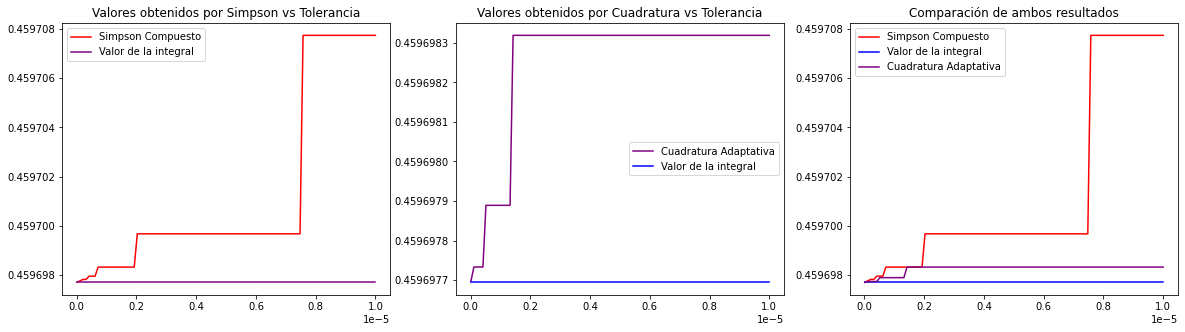

In [27]:
fig,ax=plt.subplots(1,3,figsize=(20,5))
ax[0].plot(Tolerancias,Simpson,label='Simpson Compuesto',color='red')
ax[0].plot(Tolerancias,Real,label='Valor de la integral',color='purple')
ax[0].legend()
ax[0].set_title('Valores obtenidos por Simpson vs Tolerancia')
ax[1].plot(Tolerancias,Adaptativo,label='Cuadratura Adaptativa',color='purple')
ax[1].plot(Tolerancias,Real,label='Valor de la integral',color='blue')
ax[1].ticklabel_format(axis="y", style="plain", useOffset=False)
ax[1].legend()
ax[1].set_title('Valores obtenidos por Cuadratura vs Tolerancia')
ax[2].plot(Tolerancias,Simpson,label='Simpson Compuesto',color='red')
ax[2].plot(Tolerancias,Real,label='Valor de la integral',color='blue')
ax[2].plot(Tolerancias,Adaptativo,label='Cuadratura Adaptativa',color='purple')
ax[2].legend()
ax[2].set_title('Comparación de ambos resultados')
plt.show()

In [28]:
def Tiempo_Simpson(f,a,b,tol,N):
    begin=time()
    for i in range(N):
        Simpson_C(f,a,b,tol)
    end=time()
    return (end-begin)/N

In [29]:
Tiempo_Simpson(np.sin,0,1,10**-6,1000)

0.00012067675590515136

In [30]:
def Tiempo_Adaptative(f,a,b,tol,N):
    begin=time()
    for i in range(N):
        adaptive(f,a,b,tol)
    end=time()
    return (end-begin)/N

In [31]:
Tiempo_Adaptative(np.sin,0,1,10**-6,1000)

2.7953147888183594e-05

Para calcular el tiempo de estos dos métodos usamos una función que calcule la integral N cantidad de veces, tomando el tiempo de cada uno y luego tomando el promedio de estos.

In [32]:
Tiempo_Simpson_Total=[Tiempo_Simpson(np.sin, 0, 1, i, 1000) for i in Tolerancias]
Tiempo_Adaptative_Total=[Tiempo_Adaptative(np.sin, 0, 1, i, 1000) for i in Tolerancias]

Ahora haremos una simulación del cálculo del tiempo con las distintas tolerancias.

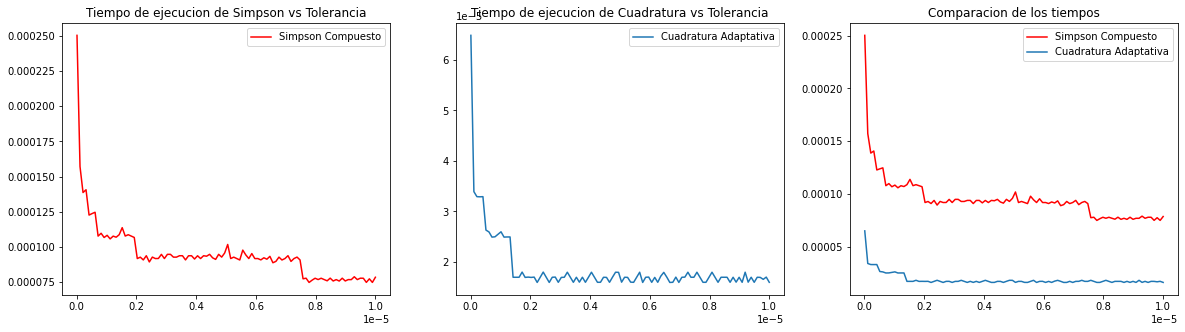

In [33]:
fig,ax=plt.subplots(1,3,figsize=(20,5))
ax[0].plot(Tolerancias,Tiempo_Simpson_Total,label='Simpson Compuesto',color='red')
ax[0].legend()
ax[0].set_title('Tiempo de ejecucion de Simpson vs Tolerancia')
ax[1].plot(Tolerancias,Tiempo_Adaptative_Total,label='Cuadratura Adaptativa')
ax[1].legend()
ax[1].set_title('Tiempo de ejecucion de Cuadratura vs Tolerancia')
ax[2].plot(Tolerancias,Tiempo_Simpson_Total,label='Simpson Compuesto',color='red')
ax[2].plot(Tolerancias,Tiempo_Adaptative_Total,label='Cuadratura Adaptativa')
ax[2].legend()
ax[2].set_title('Comparacion de los tiempos')
plt.show()

Se puede ver que el método de Simpson es más lento que el de cuadratura adaptativa, y también podemos ver que mientras más aumenta la tolerancia, disminuye la precisión y el tiempo de ejecución